# Convoluted Neural Networks (CNN)
for UBCS3, live coded 1hr workshop, by India Heisz

Markdown added in afterwards, mostly key comments and demonstrations I made during the demo. This is meant as a reference for those who attended the demo and not as a stand alone resource.

## Useful Info Prompted by Audience Questions
CNN were popularized by their glowing success on the imageNet dataset. They are very good at processing images.

CNN are not only used for image processing, however that is what it is best at.
A CNN for NLP (Natural Language Processing) [Meetup](https://www.meetup.com/LearnDataScience/events/248473200/) is happening on Monday and it would be a great way to learn more if you are interested.


## Jargon
As requested.
+ **Machine Learning** is a general category which includes neural networks.

+ **Deep** just means there are many hidden layers. So a "Deep Neural Network" is a neural network with many hidden layers. "Deep Learning" is the generic term for machine learning algorithms that have many hidden layers. We have this distinction because origionally we were limited to only a small amount of layers due to hardware constraints and issues with the chain rule blowing up or shrinking results to zero due to bad initializations (Aaron discussed this last week).

## Review of Last Week's Neural Net
[3D animated demo](http://scs.ryerson.ca/~aharley/vis/conv/) of a Neural Network similar to the one you made last week with Aaron. Note how the layers work. All nodes are connected to the nodes in adjacent layers and it is a feed forward style of network, like the one seen below.
![Deep Network](https://i.stack.imgur.com/1bCQl.png)

## How is a CNN different from the NN we Studied Last Week?
If we look at the layers of a Convoluted Neural Network we can see that it is targetting features.

![](http://research.sualab.com/assets/images/what-is-deep-learning-2/convolutional-neural-network-representations.svg)

## Useful Imports and Functions

In [1]:
from __future__ import division, print_function, unicode_literals

In [2]:
import numpy as np 
import os

In [3]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [8]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

In [10]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [11]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [12]:
import tensorflow as tf

In [14]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``im

## Filters

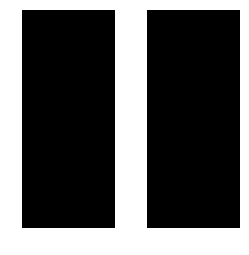

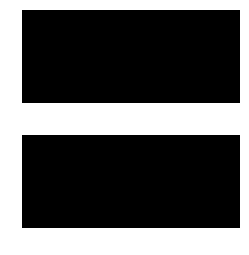

In [41]:
fmap = np.zeros(shape=(7,7,1,2), dtype = np.float32)
fmap[:,3,0,0] = 1 # fmap is like the "inverse" of the map function
fmap[3,:,0,1] = 1 
plot_image(fmap[:,:,0,0]) 
plt.show()
plot_image(fmap[:,:,0,1])
plt.show()

## The Convolution
We apply the filters seen above to a sample image. What the convolutions does is see how closely pieces of the image match the filter. With 1 for a close match and -1 for poor matches, as seen below. Note: our filters are the horizontal and vertical ones from above, not X like in the image.

![](https://brohrer.github.io/images/cnn5.png)
[Image Source](https://brohrer.github.io/how_convolutional_neural_networks_work.html)

In [19]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

## Padding Parameter
In response to a question asked during the workshop.

If you don't want to learn all the details it is fine to just use "SAME" padding in most cases. Here is a quick explanation of some padding options:

"VALID" padding, aka no padding. If the stride and kernel do not divide the image dimensions perfectly then it will drop some edge pixels to ensure that it stays within "valid" pixels, rather than pixels that are outside of the image (or other input, images are the easiest to show).

"SAME" padding, aka auto padding. Some people think this means you make the input and output the same size however that is incorrect and only happens when stride = 1. For example, for a stride of 2 the output dimensions will be half the size of the input. The details are pretty technical but you can think of it as filling in 0's to automatically resize the inputs based on the kernel and stride values, to make the kernel and stride line up well with the input. If you want to get into the gritty details [this paper](https://arxiv.org/pdf/1603.07285.pdf) is a good place to start.

In [20]:
with tf.Session() as sess:
        output = convolution.eval(feed_dict={X: images})

Saving figure china_original


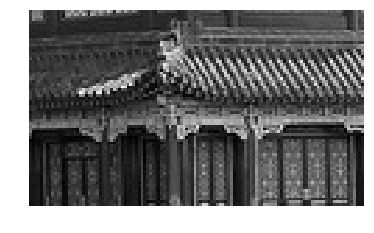

In [42]:
plot_image(images[0,:,:,0])
save_fig("china_original", tight_layout=False) # makes sure you made the /images/cnn folders
# If you don't make the folders it will probably still run, I'm guessing by storing it in RAM 
# which is not persistent storage so it will not save the images.
plt.show()

Saving figure china_vertical


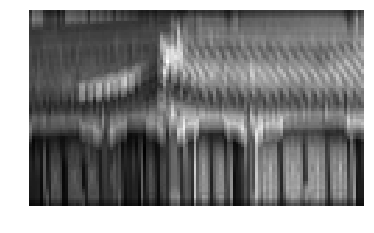

In [22]:
plot_image(output[0,:,:,0])
save_fig("china_vertical", tight_layout=False)
plt.show()

Saving figure china_horizontal


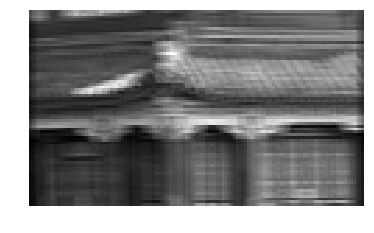

In [23]:
plot_image(output[0,:,:,1])
save_fig("china_horizontal", tight_layout=False)
plt.show()

In [24]:
import numpy as np
from sklearn.datasets import load_sample_images

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``im

In [26]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [27]:
X = tf.placeholder(tf.float32, shape = (None, height,width,channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
        output = sess.run(convolution, feed_dict={X: dataset})

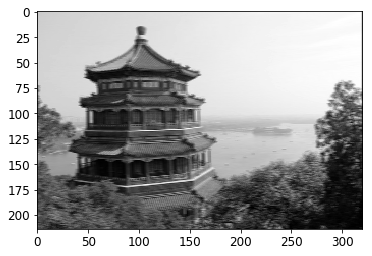

In [29]:
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()

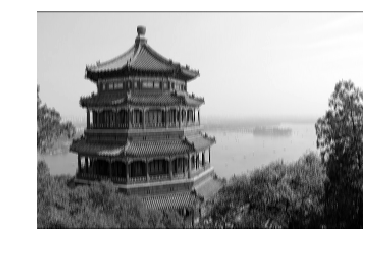

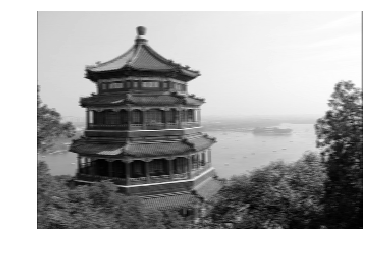

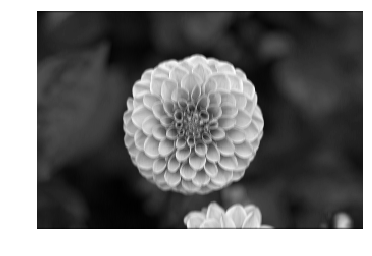

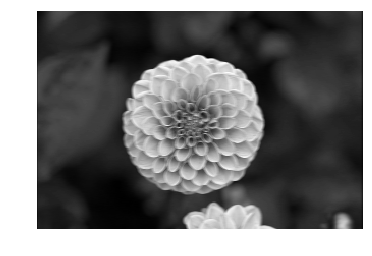

In [31]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

In [36]:
reset_graph()

X = tf.placeholder(shape = (None, height,width,channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

In [37]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

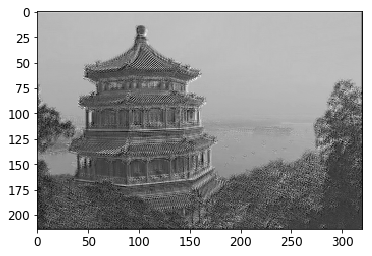

In [38]:
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()

## Coming Up Next

Next week we will look at pooling, clarify what strides and kernels are in the context of CNN's, implement some examples of CNN's (Deep Dream if we have time), possibly implement an early stopping algorithm.
We'll also do a quick recap on selective invariance since it is an important idea for successful CNN's

## Bonus Material 
When you review the notes you get bonus material that was not included in the workshop.

### More on Deep Neural Nets
An [academic paper](https://www.nature.com/articles/nature14539) which gives a clear, understandable, but reasonably in depth, explanation of deep learning.

### Is it better to have a lot of layers?
There is some disagreement among deep learning researchers on whether having more layers in a network is actually beneficial. On one hand some of the most successful image processing networks (as of March 2018) have around 150 layers when applied to specific use cases, however, generally we can see nets with only 16 layers outperforming the 150 layer ones (16 layers would still be considered deep). There have been a lot of papers published that debate this, with some fairly extreme claims being made. Personally I like to go with whatever works best given the computational resources and developer time that you have.

### Do not get trapped thinking you have to do things a certain way
Machine learning is a fickle field and I strongly urge you to keep an open mind and try new things. Don't assume that something is key to making a network work just because it is what most people in the field currently support. The state of the art changes incredibly fast. For example when Geoffrey Hinton released some of his groundbreaking papers in 2006 people thought unsupervised pretraining was the key to making a good neural network but now many of them find that unecessary. The same thing happened with initializations for the nodes of a neural network, at first they seemed like an extremely important part of making a machine learning algorithm that works but now they are mostly unecessary. Most of the best techniques were created by people trying things out, then **after** they saw them working well, the techniques were justified and rationalized. Along the lines of: try something, if it works well then that's great and  then you spend some time trying to figure out the best guesses for why it worked well. Don't be afraid to play and step outside of what is currently used!

### Interesting NIPS talk
I have been told that [this](https://www.youtube.com/watch?v=Qi1Yry33TQE) video covers similar topics to the previous two paragraphs. I have not actually watched this video so I don't endorse it but it might be interesting for some of you. NIPS (Neural Information Processing Systems, the largest AI conference in the world) talks are a great way to learn about some of the newest ML if you don't feel like reading a lot of academic papers.

### My [favourite ML podcast](https://www.thetalkingmachines.com/).